In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# apply EDA to this including preprocessing data and this about decession tree steo by step

In [ ]:
# List available files (inspect the output to find your CSV path)
import os

found_csv = False
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith('.csv'):
            print(f"Potential CSV found: {os.path.join(dirname, filename)}")
            found_csv = True

if not found_csv:
    print("No CSV files found in /kaggle/input. Please ensure your dataset is correctly linked.")

No CSV files found in /kaggle/input. Please ensure your dataset is correctly linked.


In [ ]:
# Structure and types
df.info()

# Numeric summaries
df.describe(include='number')

# Categorical summaries
# df.describe(include='object') # Commented out as there are no object columns

# Missing values overview
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
# Optional: quick target check (adjust target name if different, e.g., 'diagnosis')
target_col_guess = None
for c in df.columns:
    if c.lower() in ["diagnosis", "target", "label", "class"]:
        target_col_guess = c
        break
target_col_guess


'target'

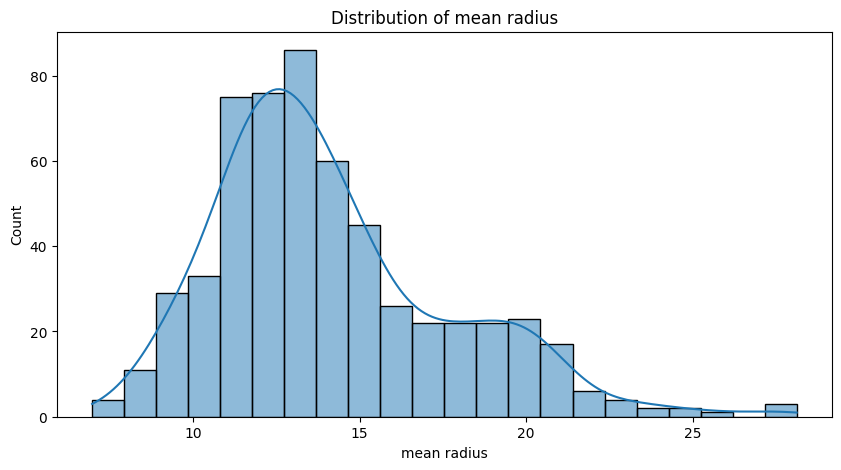

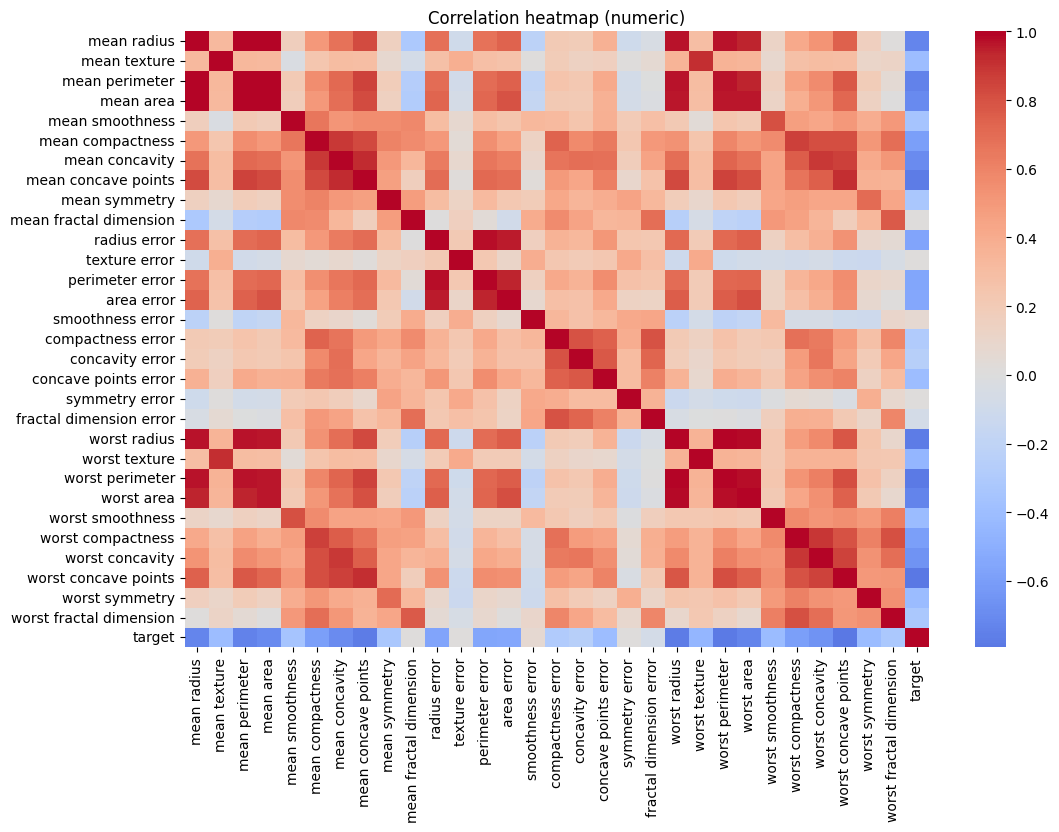

In [ ]:
# Pick a numeric column for a quick distribution plot (adjust as available)
num_cols = df.select_dtypes(include='number').columns.tolist()
if num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[num_cols[0]], kde=True)
    plt.title(f"Distribution of {num_cols[0]}")
    plt.show()

# Correlation heatmap (numeric only)
if len(num_cols) > 1:
    plt.figure(figsize=(12,8))
    sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
    plt.title("Correlation heatmap (numeric)")
    plt.show()


In [ ]:
# 4.1 Choose target column (edit this as per your dataset)
# Common breast cancer datasets use 'diagnosis' with values 'M' and 'B'
target_col = target_col_guess if target_col_guess else "diagnosis"  # change if needed

# 4.2 Basic cleaning
df_clean = df.copy()
df_clean = df_clean.drop_duplicates()

# If there are obvious ID columns, drop them (e.g., 'id')
id_like_cols = [c for c in df_clean.columns if c.lower() in ["id", "unnamed: 32", "patient_id"]]
df_clean = df_clean.drop(columns=id_like_cols)

# 4.3 Handle missing (simple strategy: drop rows with missing; you can impute if necessary)
df_clean = df_clean.dropna()

# 4.4 Encode the target if it’s categorical (e.g., M/B)
if df_clean[target_col].dtype == "object":
    # Map common labels: Malignant (M) = 1, Benign (B) = 0
    unique_vals = df_clean[target_col].unique()
    mapping = {}
    if set(unique_vals) == set(["M", "B"]) or set(unique_vals) == set(["B", "M"]):
        mapping = {"M": 1, "B": 0}
    else:
        # Fallback: factorize
        codes, uniques = pd.factorize(df_clean[target_col])
        df_clean[target_col] = codes
        print("Target mapping (factorize):", dict(enumerate(uniques)))
    if mapping:
        df_clean[target_col] = df_clean[target_col].map(mapping)

# 4.5 Split features/target
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# 4.6 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4.7 Scale (optional for trees; we’ll keep both versions)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


In [ ]:
# Gini
clf_gini = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)
clf_gini.fit(X_train, y_train)  # trees don't need scaling

y_pred_gini = clf_gini.predict(X_test)
y_proba_gini = clf_gini.predict_proba(X_test)

acc_gini = accuracy_score(y_test, y_pred_gini)
logloss_gini = log_loss(y_test, y_proba_gini)

print(f"[Gini] Accuracy: {acc_gini:.3f} | Log Loss: {logloss_gini:.3f}")
print(classification_report(y_test, y_pred_gini, digits=3))


[Gini] Accuracy: 0.947 | Log Loss: 0.125
              precision    recall  f1-score   support

           0      0.929     0.929     0.929        42
           1      0.958     0.958     0.958        72

    accuracy                          0.947       114
   macro avg      0.943     0.943     0.943       114
weighted avg      0.947     0.947     0.947       114



In [ ]:
# Entropy (Information Gain)
clf_entropy = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)
clf_entropy.fit(X_train, y_train)

y_pred_entropy = clf_entropy.predict(X_test)
y_proba_entropy = clf_entropy.predict_proba(X_test)

acc_entropy = accuracy_score(y_test, y_pred_entropy)
logloss_entropy = log_loss(y_test, y_proba_entropy)

print(f"[Entropy] Accuracy: {acc_entropy:.3f} | Log Loss: {logloss_entropy:.3f}")
print(classification_report(y_test, y_pred_entropy, digits=3))


[Entropy] Accuracy: 0.956 | Log Loss: 0.716
              precision    recall  f1-score   support

           0      0.951     0.929     0.940        42
           1      0.959     0.972     0.966        72

    accuracy                          0.956       114
   macro avg      0.955     0.950     0.953       114
weighted avg      0.956     0.956     0.956       114



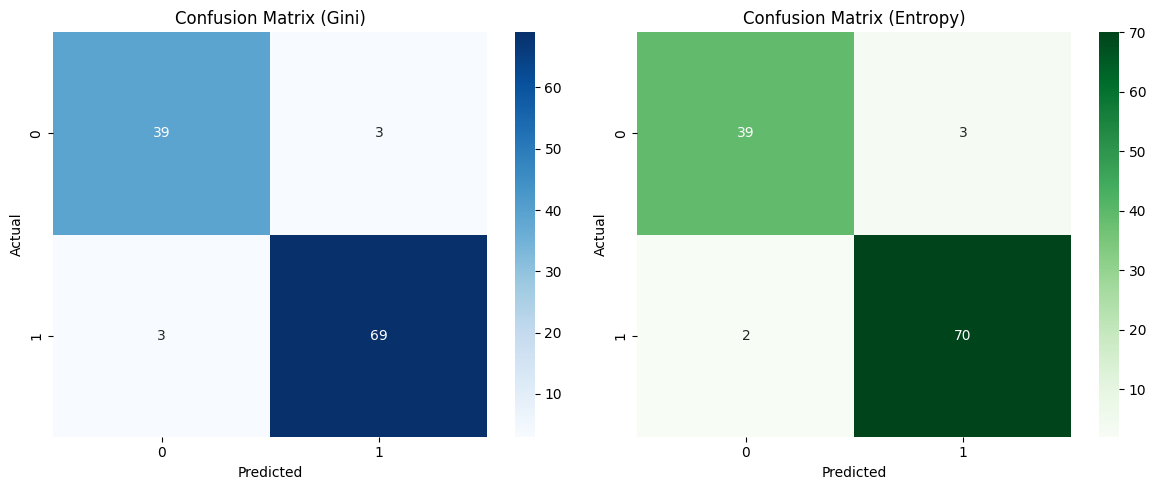

Interpretation tips:
- Accuracy: overall correctness; compare Gini vs Entropy.
- Log Loss: penalizes wrong high-confidence predictions; lower is better.
- If classes are imbalanced, examine precision/recall in the report above.


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

cm_gini = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm_gini, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (Gini)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

cm_entropy = confusion_matrix(y_test, y_pred_entropy)
sns.heatmap(cm_entropy, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix (Entropy)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

print("Interpretation tips:")
print("- Accuracy: overall correctness; compare Gini vs Entropy.")
print("- Log Loss: penalizes wrong high-confidence predictions; lower is better.")
print("- If classes are imbalanced, examine precision/recall in the report above.")


In [ ]:
# Feature importance
importances = pd.Series(clf_gini.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(10)


,0
worst radius,0.787977
worst concave points,0.130592
worst texture,0.073339
area error,0.007112
worst concavity,0.000980
mean radius,0.000000
mean compactness,0.000000
mean concavity,0.000000
mean symmetry,0.000000
mean concave points,0.000000


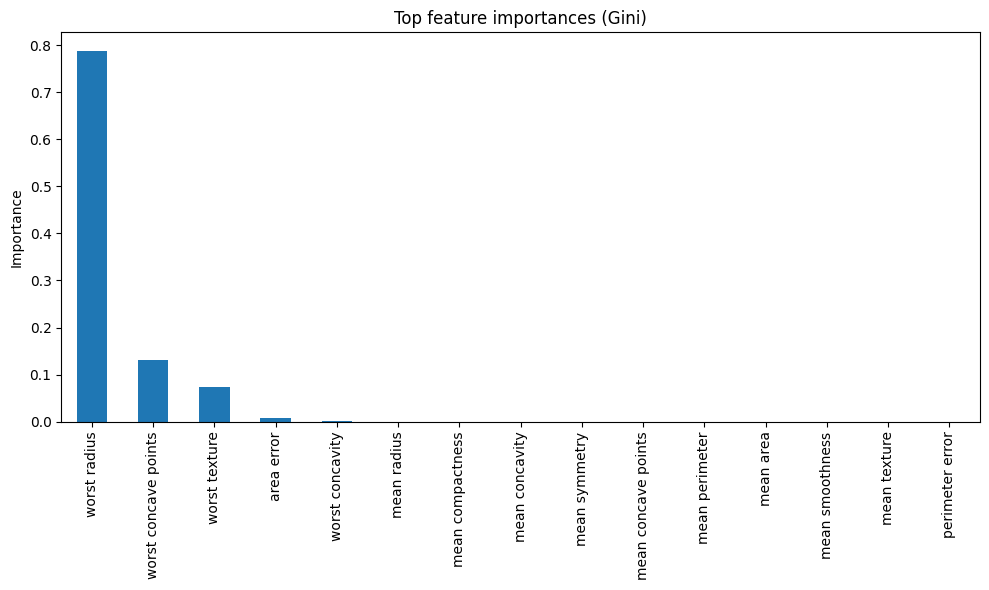

In [ ]:
# Plot top importances
plt.figure(figsize=(10,6))
importances.head(15).plot(kind="bar")
plt.title("Top feature importances (Gini)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


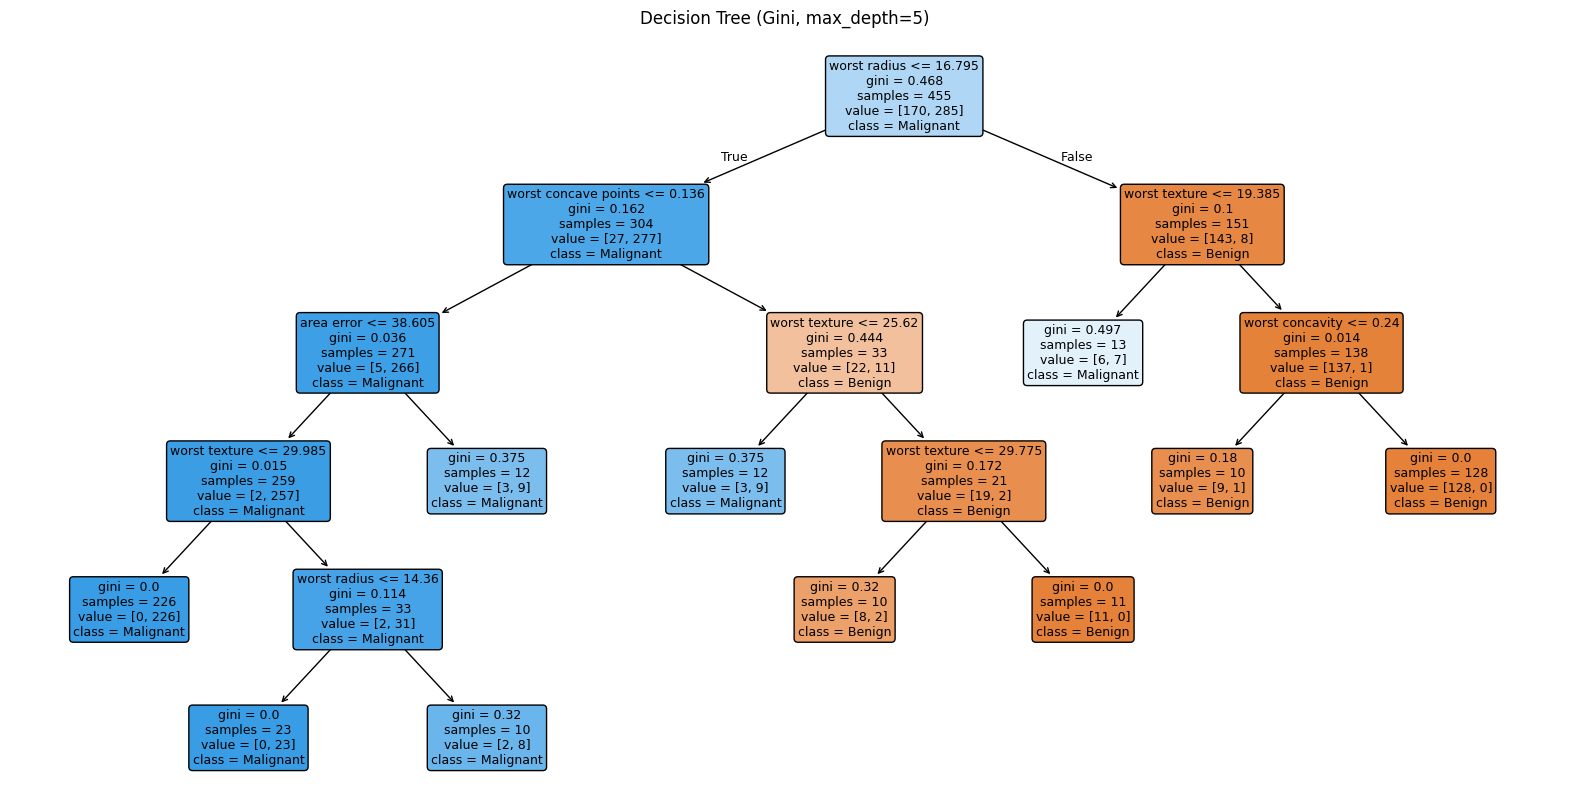

In [ ]:
# Visualize the tree (can be large; tune max_depth)
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(
    clf_gini,
    feature_names=X.columns,
    class_names=["Benign","Malignant"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree (Gini, max_depth=5)")
plt.show()


In [ ]:
import os

# Create the directory if it doesn't exist
os.makedirs('/kaggle/working', exist_ok=True)

# Save cleaned dataset
df_clean.to_csv("/kaggle/working/breast_cancer_clean.csv", index=False)

# Save predictions (both criteria)
pd.DataFrame({
    "y_true": y_test,
    "y_pred_gini": y_pred_gini,
    "y_pred_entropy": y_pred_entropy,
    "proba_gini_malignant": y_proba_gini[:,1],
    "proba_entropy_malignant": y_proba_entropy[:,1]
}).to_csv("/kaggle/working/predictions_breast_cancer.csv", index=False)

print("Saved: /kaggle/working/breast_cancer_clean.csv")
print("Saved: /kaggle/working/predictions_breast_cancer.csv")

Saved: /kaggle/working/breast_cancer_clean.csv
Saved: /kaggle/working/predictions_breast_cancer.csv
